$$0=A_1- B\chi_1 - \mu_{11}\chi_1^2 -\chi_1 \mu_{12}\chi_2$$
$$0=A_2- B\chi_2 - \chi_2 \mu_{21}\chi_1 -\mu_{22}\chi_2^2-\chi_2 \mu_{23}\chi_3$$
$$0=A_3- B\chi_3-\chi_3 \mu_{32}\chi_2- \mu_{33}\chi_3^2$$

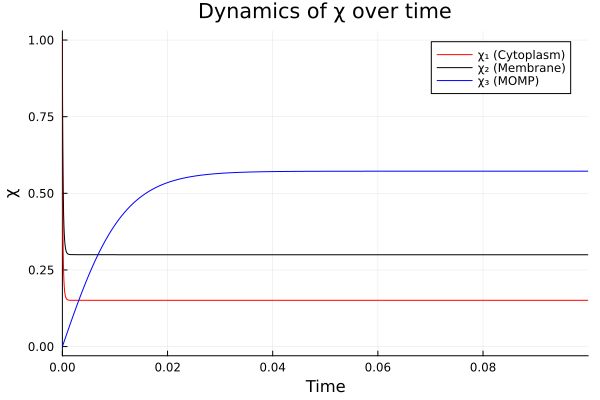

In [109]:
using DifferentialEquations, Plots

μ₁₁ = 16273.465487425427
μ₂₂ = 7800.653148254713
μ₃₃ = 140.00867213154856
μ₁₂ = 8.841868906761077e-7
μ₁₃ = 0.0
μ₂₃ = 11.674613405026601
μ₂₁ = 0.0583254283653529
μ₃₁ = 0.0
μ₃₂ = 23.34605808990502

function bcl2!(dχ, χ, p, t)
    χ₁, χ₂, χ₃ = χ
    A₁, A₂, A₃, B = p
    
    dχ[1] =  A₁ - B*χ₁ - μ₁₁*χ₁^2 - χ₁*μ₁₂*χ₂
    dχ[2] =  A₂ - B*χ₂ - χ₂*μ₂₁*χ₁ - μ₂₂*χ₂^2 - χ₂*μ₂₃*χ₃
    dχ[3] =  A₃ - B*χ₃ - χ₃*μ₃₂*χ₂ - μ₃₃*χ₃^2
end

χ₀ = [1, 1, 0]
tspan = (0, .10)
params = [370.91, 702.10, 50, 0.255]


# Define the ODE problem
prob = ODEProblem(bcl2!, χ₀, tspan, params)
sol = solve(prob, Rodas4P(), reltol=1e-8, abstol=1e-8)

# Plot the dynamics of χ as a function of time
plot(sol, title="Dynamics of χ over time", xlabel="Time", ylabel="χ", legend=:topright, label=["χ₁ (Cytoplasm)" "χ₂ (Membrane)" "χ₃ (MOMP)"], color=[:red :black :blue])